In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



ModuleNotFoundError: No module named 'statmodels'

In [90]:
plt.style.use('fivethirtyeight')

In [110]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])
var_set.index.name = 'date'

In [83]:
var_set.describe()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI
count,507.000000,507.000000,507.000000,507.00000,507.000000
mean,56.746134,24.553419,58.029858,107.68787,113.528519
std,15.455462,8.096777,7.900179,8.49126,8.544862
min,27.870000,10.275557,36.507234,95.55000,92.040000
25%,44.875000,20.365239,51.971903,100.22500,110.127000
50%,55.460000,24.035290,59.300626,105.90000,114.486000
75%,65.710000,30.478502,63.418690,112.40000,118.710500
max,125.870000,49.076318,79.182888,129.50000,138.094000


<Axes: title={'center': 'Evolution of the Salmon Price'}>

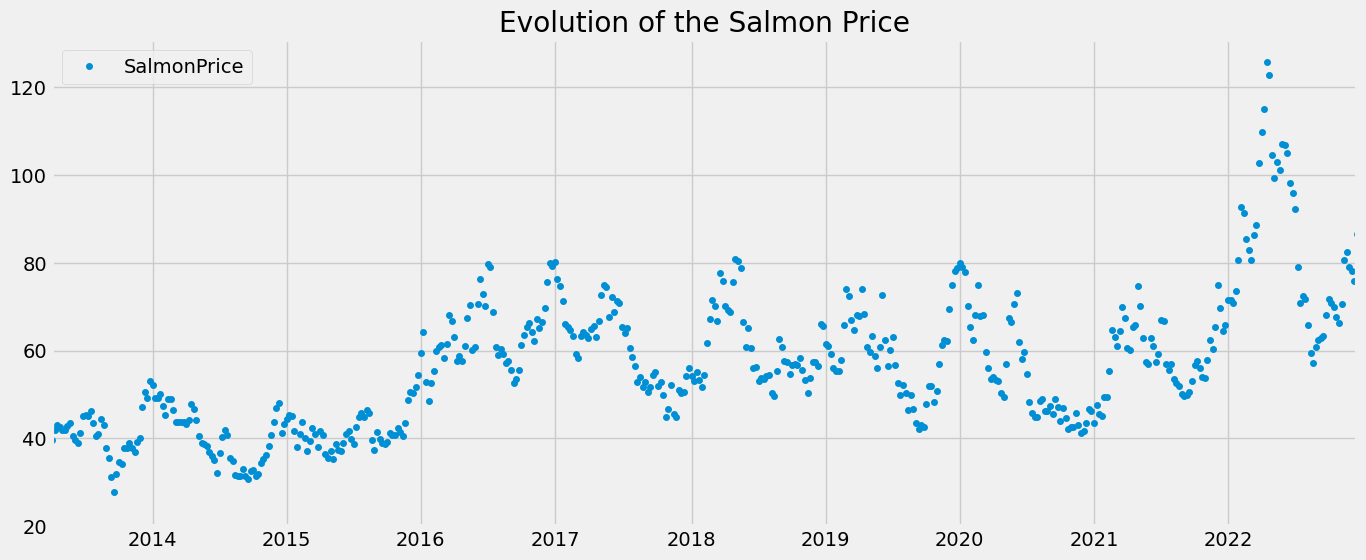

In [84]:
var_set.SalmonPrice.plot(figsize=(15,6), legend=True, title='Evolution of the Salmon Price', yticks = (20, 40, 60, 80, 100, 120), style='.', mew=2)


In [111]:
regline = smf.ols(formula = 'SalmonPrice~date', data = var_set).fit()

NameError: name 'smf' is not defined

In [93]:
var_set.dtypes

SalmonPrice     float64
CodPrice        float64
HalibutPrice    float64
CPI             float64
TWI             float64
dtype: object

In [7]:
var_set.corr()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI
SalmonPrice,1.000000,0.618946,0.475260,0.641214,0.429407
CodPrice,0.618946,1.000000,0.472403,0.884648,0.800880
HalibutPrice,0.475260,0.472403,1.000000,0.422434,0.251690
CPI,0.641214,0.884648,0.422434,1.000000,0.732456
TWI,0.429407,0.800880,0.251690,0.732456,1.000000


In [94]:
var_set.cov()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI
SalmonPrice,238.871306,77.454556,58.029708,84.150539,56.709516
CodPrice,77.454556,65.557801,30.217697,60.821149,55.409534
HalibutPrice,58.029708,30.217697,62.412827,28.337900,16.990588
CPI,84.150539,60.821149,28.337900,72.101491,53.144554
TWI,56.709516,55.409534,16.990588,53.144554,73.014661


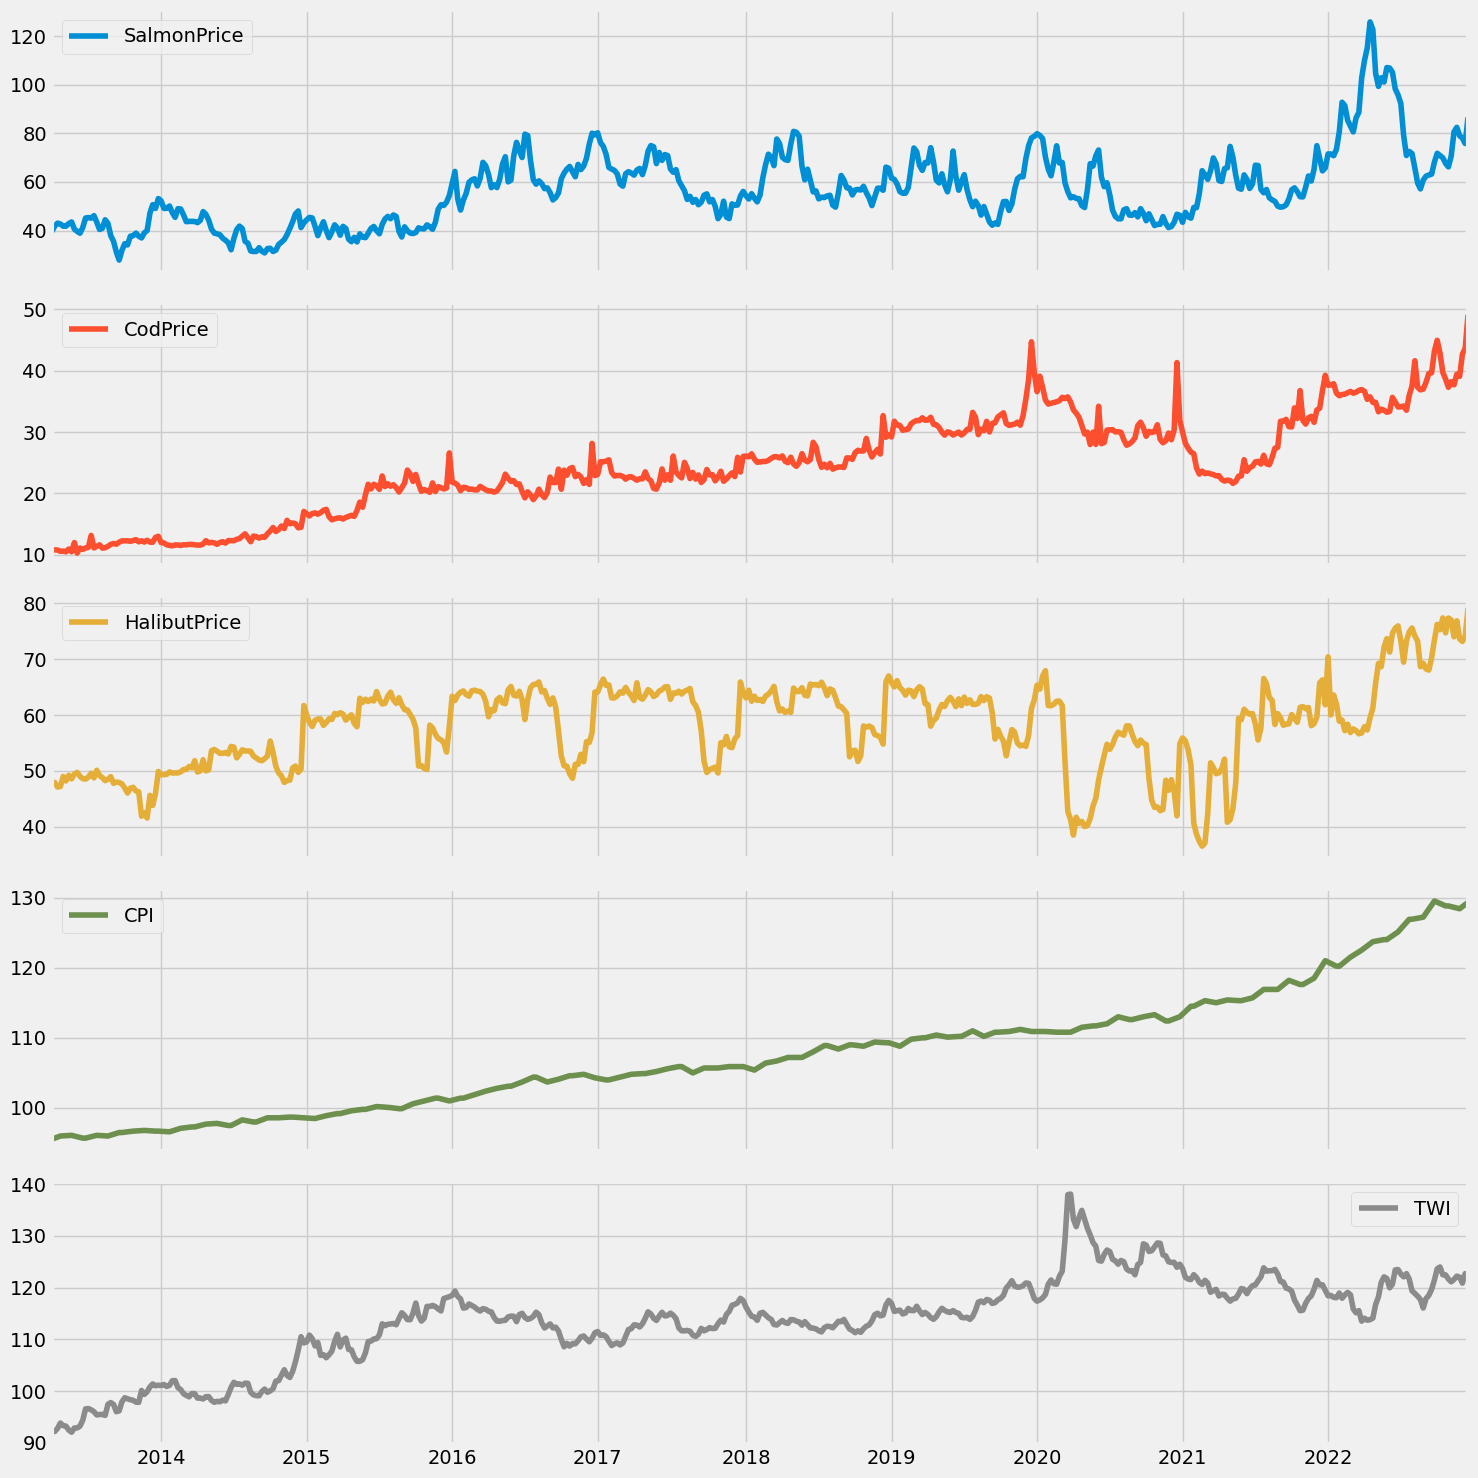

In [8]:
var_set.plot(subplots = True, figsize=(15,15))

plt.tight_layout()
plt.show()

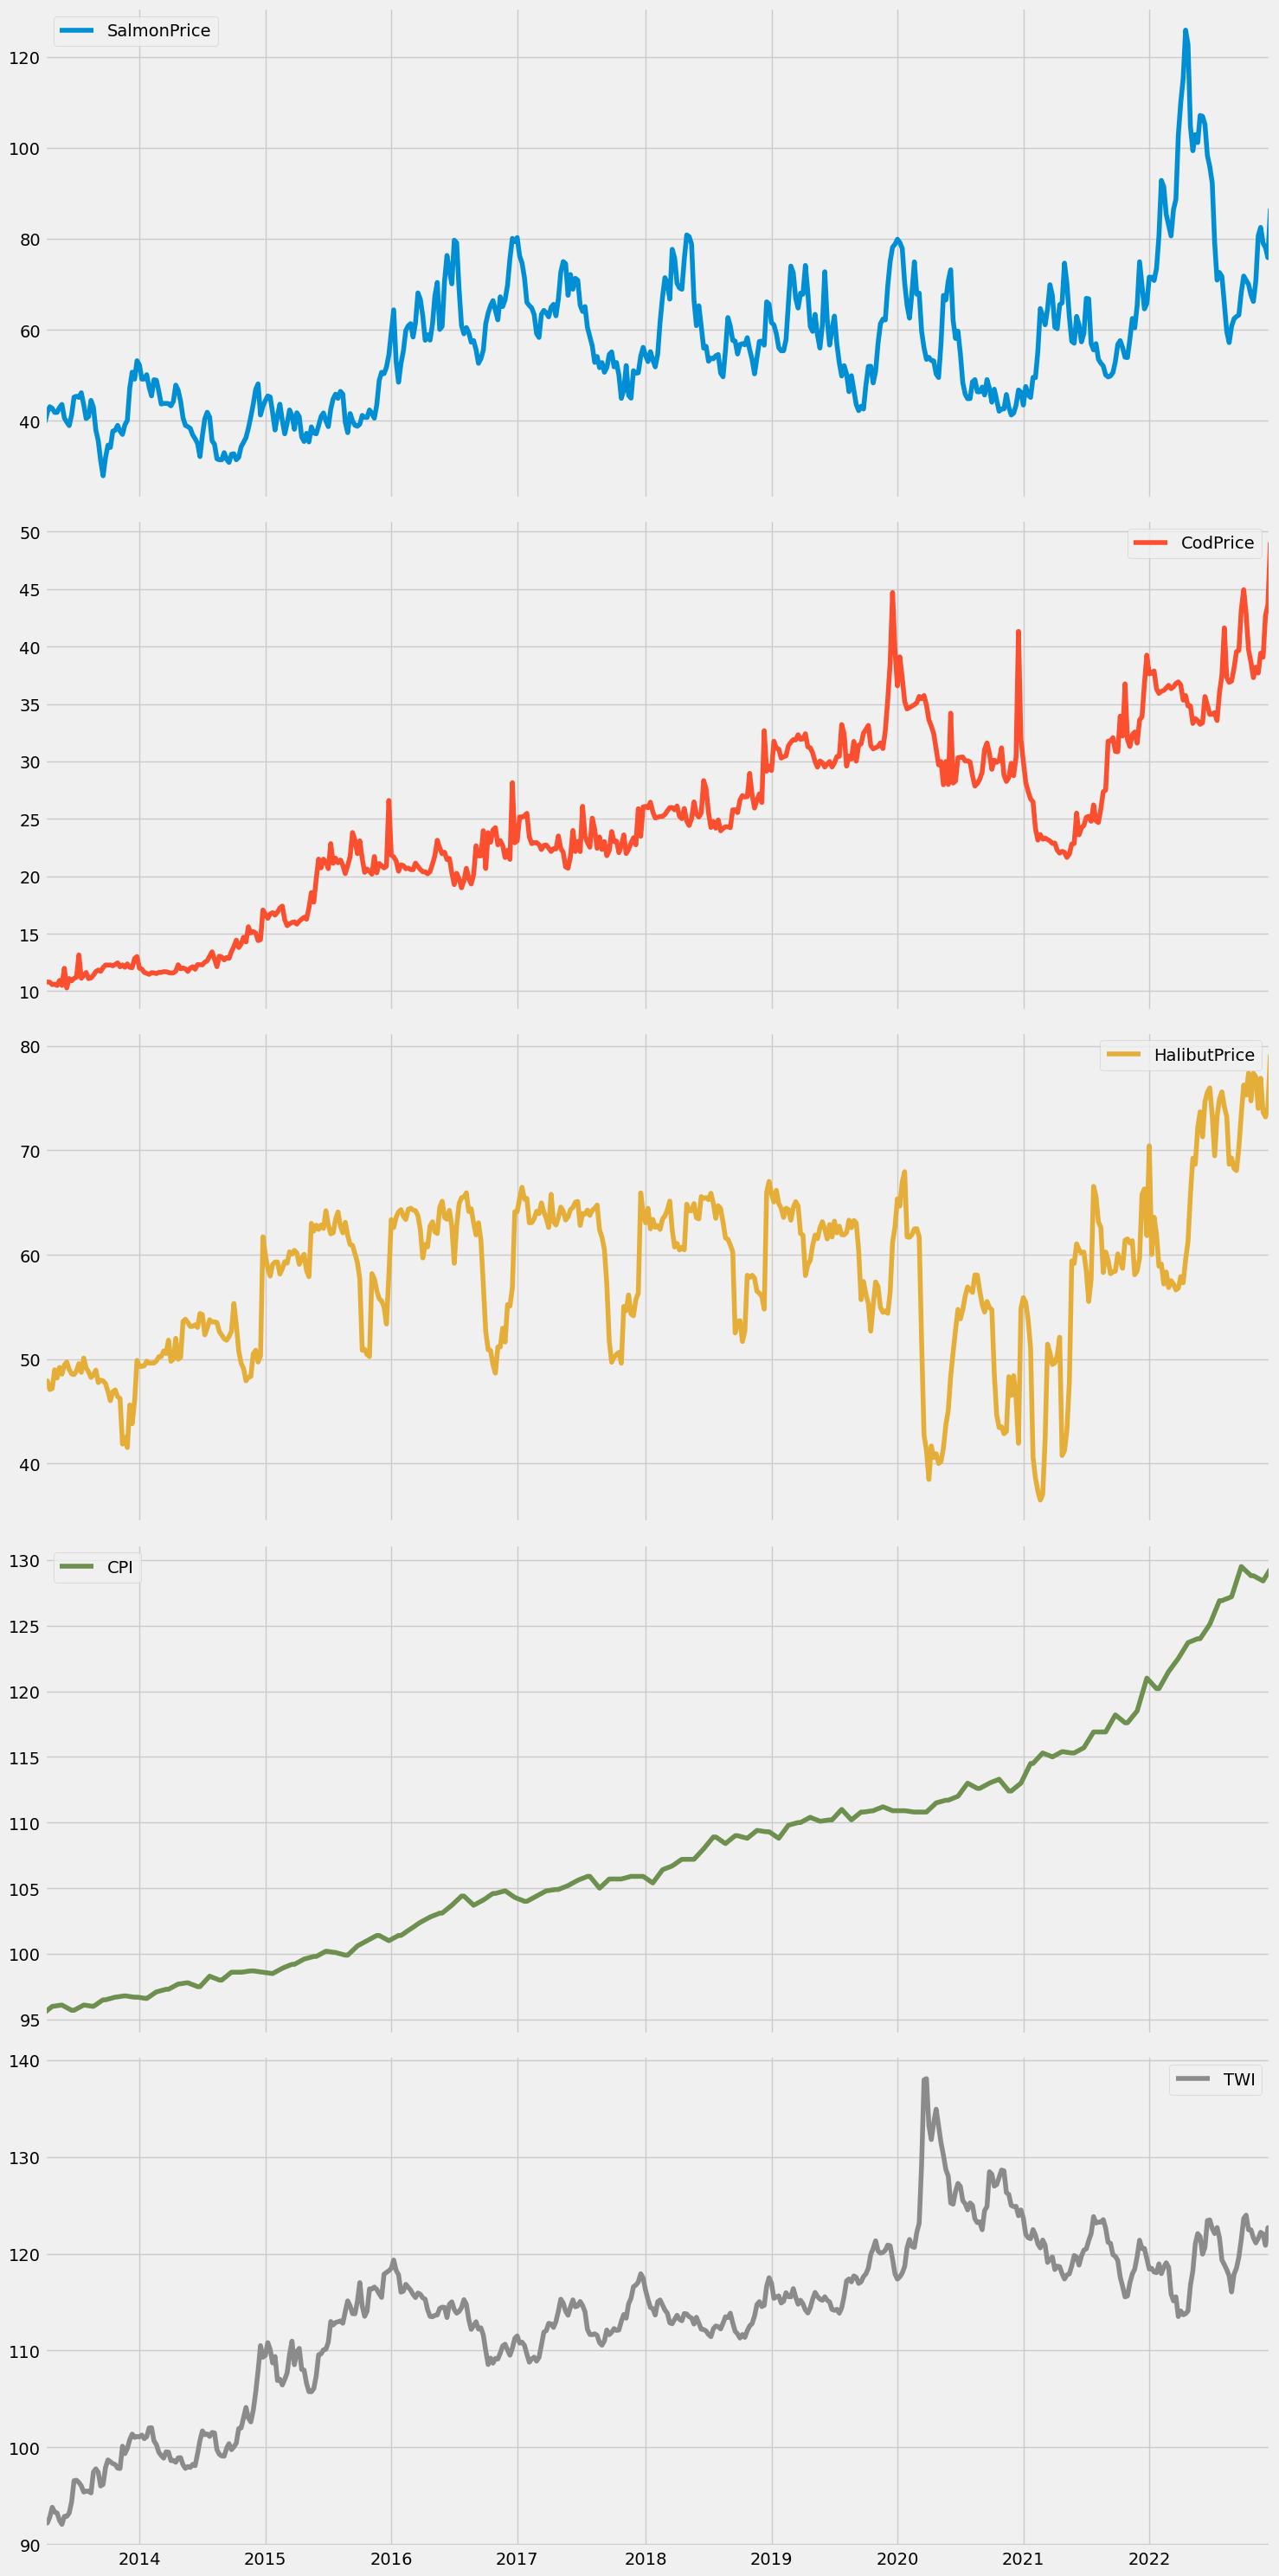

In [9]:
var_set.plot(subplots = True, figsize=(15,30))

plt.tight_layout()
plt.show()



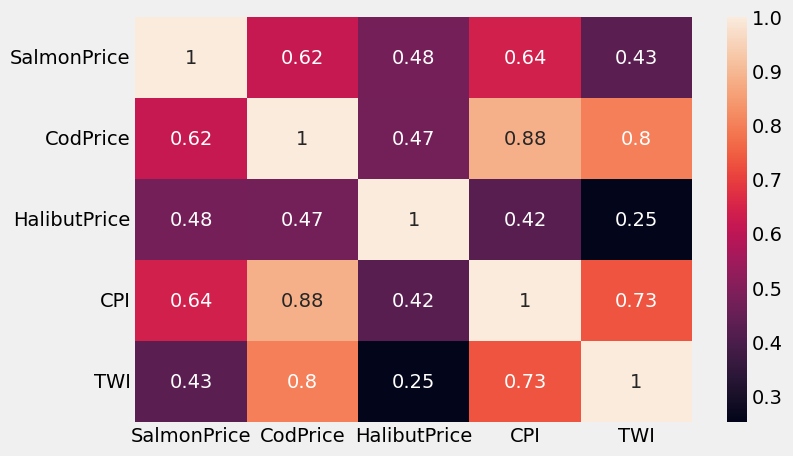

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(var_set.corr(numeric_only=True), annot=True)
plt.show()

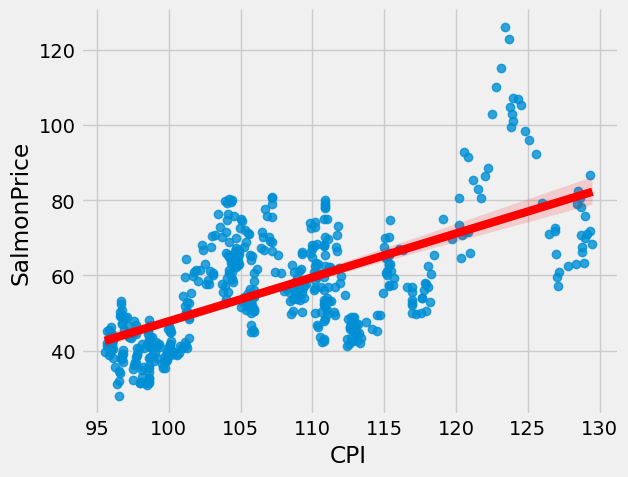

In [11]:
sns.lmplot(x="CPI", y="SalmonPrice", data=var_set,height=5, aspect=1.3, line_kws={'color': 'red'})

plt.show()